In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dane_obrobione.csv").set_index("liczba cząstek")

df = df.drop(['Python'], axis=1)
df_jit = pd.read_csv("inz_data_jit.csv").set_index('n_particles')
df_nojit = pd.read_csv("inz_data_no_jit.csv").set_index('n_particles')
df['Python (JIT)'] = df_jit['runtime']
df['Python'] = df_nojit['runtime']
cols = df.columns.tolist()
cols = [cols[4]] + [cols[3]] + cols[:3]
df = df[cols]
def float_format(s):
    return '%1.2f' % s
df.fillna('--').to_latex("/home/dominik/Inzynierka/ThesisText/runtimes_table", decimal =',', float_format=float_format)
df

,Python,Python (JIT),C bez flag,C -O,C -O2
liczba cząstek,,,,,
100,15.887594,22.272937,3.09273,0.096052,0.160393
200,14.394342,20.509111,6.28038,0.265214,0.259203
500,17.168805,23.438502,NaN,NaN,NaN
750,NaN,NaN,4.64560,0.500280,0.979375
1000,21.711905,28.036865,NaN,NaN,NaN
1750,NaN,NaN,42.46330,1.064950,NaN
2000,28.870325,36.095785,49.97820,1.221610,2.326450
2500,NaN,NaN,67.72100,1.551030,2.822210
5000,49.720073,57.162342,132.49500,3.144620,2.109920


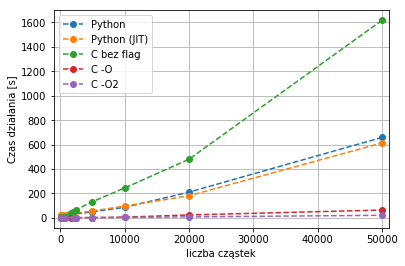

In [3]:
fig, ax = plt.subplots()
for y in df.columns:
    local_df = df[y].dropna()    
    local_df.plot(y=y, ax=ax, style='--o', legend=False)
ax.grid(True)
ax.legend();
ax.set_ylabel("Czas działania [s]")
ax.set_xlim(-1000, 51000)
fig.savefig('/home/dominik/Inzynierka/ThesisText/Images/runtimes.eps', dpi=1200)

In [4]:
df2 = 1000/df
df2

,Python,Python (JIT),C bez flag,C -O,C -O2
liczba cząstek,,,,,
100,62.942194,44.897537,323.338927,10411.016521,6234.686052
200,69.471741,48.758818,159.226034,3770.540017,3857.980039
500,58.245172,42.664842,NaN,NaN,NaN
750,NaN,NaN,215.257448,1998.880627,1021.059349
1000,46.057682,35.667325,NaN,NaN,NaN
1750,NaN,NaN,23.549748,939.011221,NaN
2000,34.637643,27.704066,20.008724,818.591858,429.839455
2500,NaN,NaN,14.766468,644.732855,354.332243
5000,20.112601,17.494035,7.547455,318.003447,473.951619


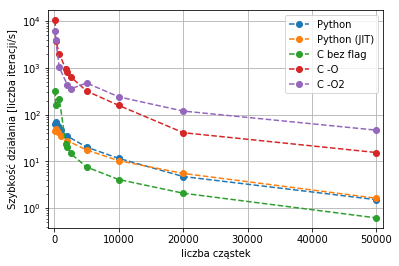

In [5]:
fig, ax = plt.subplots()
for y in df2.columns:
    local_df = df2[y].dropna()
    local_df.plot(y=y, ax=ax, label=y, style='--o', legend=False, logy=True)
ax.grid(True)
ax.legend();
ax.set_xlim(-1000, 51000)
ax.set_ylabel("Szybkość działania [liczba iteracji/s]")
fig.savefig('/home/dominik/Inzynierka/ThesisText/Images/speeds.eps', dpi=1200)